## Morphological Unwrapping

**Act 2**

_Oct 16 - _

### Background

Proceeding from previous morphology analysis, I aim to figure out unrolling the frames using morphology data.

Essentially, now that we have the skeleton of the image, we'd want to take pixels from the axis and put them in straight line (removing the curvature). Of course this is not the most accurate approach, and will likely suffer -- but it should give a good idea whether moving forward this way is going to be feasible or not.

In [1]:
# Get required stuff here

%matplotlib inline

import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.color
import skimage.segmentation
import skimage.util
import skimage.util.colormap

import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from collections import namedtuple

In [2]:
## Bring back some handy methods defined earlier.
root_images = namedtuple('RootImages', ['root', 'grey', 'bin', 'name', 'thin'])

def get_image(path):
  '''Return tuple of pre-processed image.'''
  root = skimage.io.imread(path)
  grey = skimage.color.rgb2gray(root)
  
  # Using `yen` thresholds.
  threshold = skimage.filters.threshold_otsu(grey)
  binary = grey < threshold

  # Get the thin axis morphology of the image as well.
  thin = skimage.morphology.thin(binary)
  return root_images(root, grey, binary, os.path.basename(path), thin)

## Unrolling shapes on a central line

Below, I demonstrate unrolling of shapes using a single line approach. Essentially, we take pixel values from a specific region of each frame.

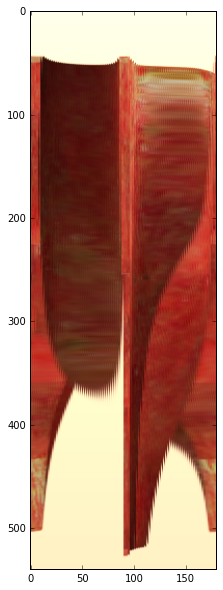

In [3]:
## For a way to compare, the naïve approach of unrolling would produce something like this:
stem_sim_imgs = sorted(glob.glob('./tmp/fake_stem/*.png'))

slices = [skimage.io.imread(f)[:,485:487,:] for f in stem_sim_imgs]
joined = np.concatenate(slices, axis=1)

plt.figure(1, figsize=(5, 10))
plt.imshow(joined)

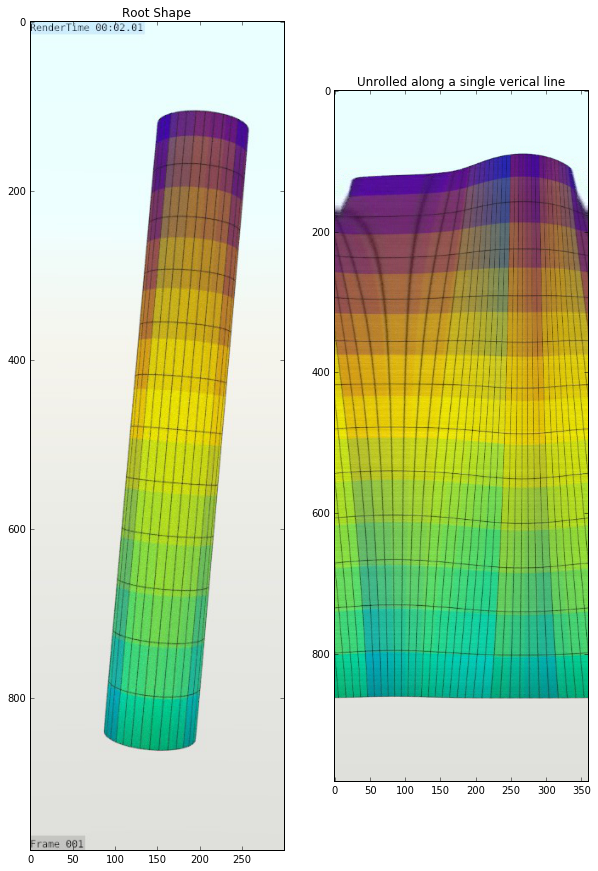

In [4]:
# I really should produce a better Blender model for this...
# The model itself has varying patterns, hence it's crooked like this.
# I am going to make a simpler cylinder and render grids on it.

tilt_cyl_imgs = sorted(glob.glob('./tmp/tilt_cyl_3/*.jpg'))


slices = [skimage.io.imread(f)[:,145:146,:] for f in tilt_cyl_imgs]
joined = np.concatenate(slices, axis=1)

img_tilt_cyl = get_image(tilt_cyl_imgs[0])

plt.figure(2, figsize=(10, 20))

plt.subplot(121)
plt.title('Root Shape')
plt.imshow(img_tilt_cyl.root)

plt.subplot(122)
plt.title('Unrolled along a single verical line')
plt.imshow(joined)

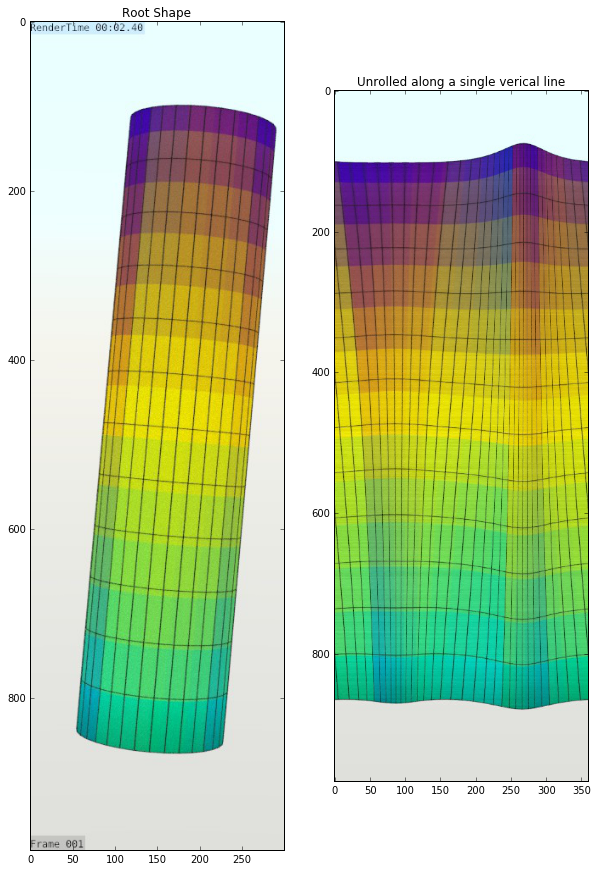

In [5]:
# Unrolling of an oval-ish tilted cylinder.

tilt_cyl_imgs = sorted(glob.glob('./tmp/tilt_cyl_4/*.jpg'))


slices = [skimage.io.imread(f)[:,145:146,:] for f in tilt_cyl_imgs]
joined = np.concatenate(slices, axis=1)

img_tilt_cyl = get_image(tilt_cyl_imgs[0])

plt.figure(3, figsize=(10, 20))

plt.subplot(121)
plt.title('Root Shape')
plt.imshow(img_tilt_cyl.root)

plt.subplot(122)
plt.title('Unrolled along a single verical line')
plt.imshow(joined)

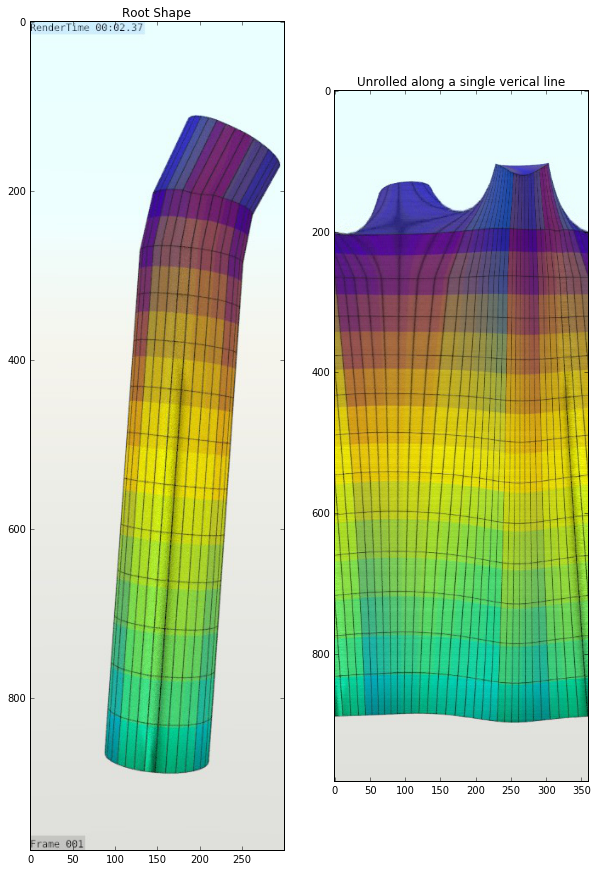

In [6]:
# Unrolling of a more realistic deformed cylinder.

tilt_cyl_imgs = sorted(glob.glob('./tmp/tilt_cyl_5/*.jpg'))


slices = [skimage.io.imread(f)[:,145:146,:] for f in tilt_cyl_imgs]
joined = np.concatenate(slices, axis=1)

img_tilt_cyl = get_image(tilt_cyl_imgs[0])

plt.figure(4, figsize=(10, 20))

plt.subplot(121)
plt.title('Root Shape')
plt.imshow(img_tilt_cyl.root)

plt.subplot(122)
plt.title('Unrolled along a single verical line')
plt.imshow(joined)

## Unrolling along the object axis

Next, we're unrolling the object by taking pixels from its vertical axis.

I found an error through using the thresholding using yen (and otsu) methods which fails for some values. I'm gonna have to separate object from the root image using some other thresholding (perhaps local thresholding) method.

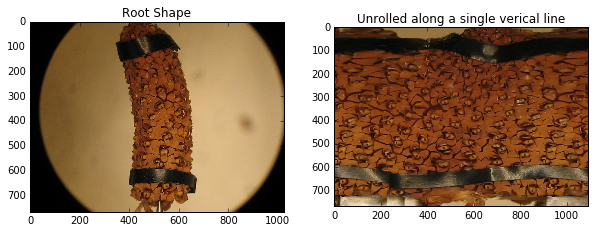

In [3]:
# Unrolling of a more realistic deformed cylinder.

tilt_cyl_imgs = sorted(glob.glob('./tmp/dl_mvi_1233/*.jpg'))


slices = [skimage.io.imread(f)[:,508:509,:] for f in tilt_cyl_imgs]
joined = np.concatenate(slices, axis=1)

img_tilt_cyl = get_image(tilt_cyl_imgs[0])

plt.figure(4, figsize=(10, 20))

plt.subplot(121)
plt.title('Root Shape')
plt.imshow(img_tilt_cyl.root)

plt.subplot(122)
plt.title('Unrolled along a single verical line')
plt.imshow(joined)

In [4]:
plt.imsave('./imgs/1233.png', joined)